<a href="https://colab.research.google.com/github/himansuranjan1/cat-vs-dog/blob/main/md.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.cluster import adjusted_rand_score

In [16]:
data = pd.read_csv("/content/mcdonalds.csv")
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [17]:
data.shape

(1453, 15)

In [18]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [19]:
data.iloc[0:5,0:11]

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [20]:
def y_n(x):
  if x=='Yes':
    return 1
  else:
     return 0

In [21]:
df=data.iloc[:,0:11]
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [22]:
df=df.applymap(y_n)

In [23]:
df[:5]

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [24]:
df.isnull().sum()

yummy         0
convenient    0
spicy         0
fattening     0
greasy        0
fast          0
cheap         0
tasty         0
expensive     0
healthy       0
disgusting    0
dtype: int64

In [25]:
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
dtypes: int64(11)
memory usage: 125.0 KB


In [27]:
np.round(np.mean(df, axis=0), 2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
MD_scaled = scaler.fit_transform(df)
dff = pd.DataFrame(MD_scaled, columns = df.columns)
dff.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,-1.111479,0.318735,-0.321349,0.391375,-1.054476,0.332951,0.818605,-1.345528,1.339489,-0.498279,-0.566488
1,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,1.339489,-0.498279,-0.566488
2,-1.111479,0.318735,3.111884,0.391375,0.948339,0.332951,-1.221590,0.743203,1.339489,2.006908,-0.566488
3,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,-0.746553,-0.498279,1.765261
4,-1.111479,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,-1.345528,-0.746553,2.006908,-0.566488


In [29]:
from sklearn.decomposition import PCA
k = 10
pca = PCA(n_components = 10)

In [30]:
MD_pca = pca.fit_transform(MD_scaled)
MD_pca.shape

(1453, 10)

In [31]:
explained_variances = pca.explained_variance_ratio_
explained_variances

array([0.25556637, 0.14834762, 0.12546909, 0.09826971, 0.08348356,
       0.07109102, 0.06498559, 0.05384477, 0.04762809, 0.02796379])

In [32]:
std_deviations = np.sqrt(explained_variances)
std_deviations

array([0.50553573, 0.38515922, 0.35421616, 0.31348   , 0.28893522,
       0.26662899, 0.25492271, 0.23204476, 0.2182386 , 0.16722376])

In [33]:
rotation_matrix = pca.components_
rotation_matrix

array([[-0.40695508, -0.30882741, -0.02332033,  0.17786071,  0.26779582,
        -0.21303906, -0.28913434, -0.42611499,  0.29094445, -0.26683857,
         0.41074387],
       [ 0.28261487, -0.04568172,  0.0699822 , -0.20559024, -0.13630029,
        -0.28244059, -0.57503178,  0.24219851,  0.56752776,  0.20103082,
        -0.14388846],
       [-0.25958798, -0.31715142,  0.0201696 , -0.60807736, -0.38956798,
        -0.21139458,  0.1251574 , -0.26964779, -0.18329788,  0.36781371,
         0.09029919],
       [ 0.02623694, -0.00942396,  0.84549641, -0.02339555,  0.33085439,
         0.09036315,  0.11447698,  0.0726908 ,  0.03550987,  0.30198954,
         0.23523093],
       [ 0.34685741, -0.43714795, -0.185551  ,  0.08693385,  0.3437128 ,
        -0.56893862,  0.25698101,  0.2860986 , -0.20736179,  0.05178742,
         0.10584327],
       [-0.12491568,  0.18896641,  0.43866119,  0.1075199 , -0.27832865,
        -0.57273434,  0.02065707, -0.05305267, -0.17116009, -0.4461664 ,
        -0.328

In [34]:
des_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(k)],
    'Standard Deviation': std_deviations,
    'Proportion of Variance': explained_variances,
    'Cumulative Proportion': np.cumsum(explained_variances)
})

pd.set_option('display.float_format', lambda x: f'{x:.2f}')
print(des_df)

  Principal Component  Standard Deviation  Proportion of Variance  \
0                 PC1                0.51                    0.26   
1                 PC2                0.39                    0.15   
2                 PC3                0.35                    0.13   
3                 PC4                0.31                    0.10   
4                 PC5                0.29                    0.08   
5                 PC6                0.27                    0.07   
6                 PC7                0.25                    0.06   
7                 PC8                0.23                    0.05   
8                 PC9                0.22                    0.05   
9                PC10                0.17                    0.03   

   Cumulative Proportion  
0                   0.26  
1                   0.40  
2                   0.53  
3                   0.63  
4                   0.71  
5                   0.78  
6                   0.85  
7                   0.90

In [35]:
pc_num = np.arange(pca.n_components_) + 1
pc_num

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

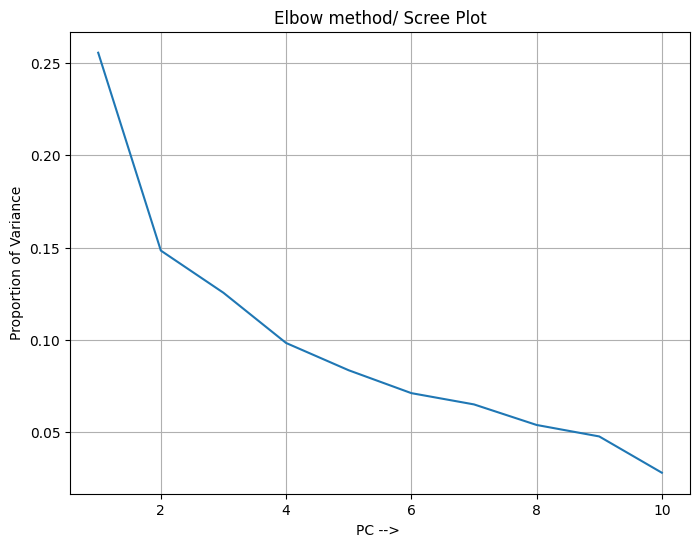

In [36]:
plt.figure(figsize = (8, 6))
plt.plot(pc_num, explained_variances)

plt.title('Elbow method/ Scree Plot')
plt.xlabel('PC --> ')
plt.ylabel('Proportion of Variance')

plt.grid(True)
plt.show()

In [37]:
var = pca.explained_variance_
var

array([2.81316617, 1.6329477 , 1.38111047, 1.08171127, 0.91895162,
       0.78253978, 0.71533376, 0.59270042, 0.52426978, 0.3078135 ])

In [38]:
std_d = np.sqrt(var)
std_d

array([1.67724959, 1.27786842, 1.17520657, 1.04005349, 0.95861964,
       0.88461278, 0.84577406, 0.76987039, 0.72406476, 0.55480943])

In [39]:
for i, std_dev in enumerate(std_d):
    print(f'Standard Deviation (PC{i+1}): {std_dev:.2f}')

Standard Deviation (PC1): 1.68
Standard Deviation (PC2): 1.28
Standard Deviation (PC3): 1.18
Standard Deviation (PC4): 1.04
Standard Deviation (PC5): 0.96
Standard Deviation (PC6): 0.88
Standard Deviation (PC7): 0.85
Standard Deviation (PC8): 0.77
Standard Deviation (PC9): 0.72
Standard Deviation (PC10): 0.55


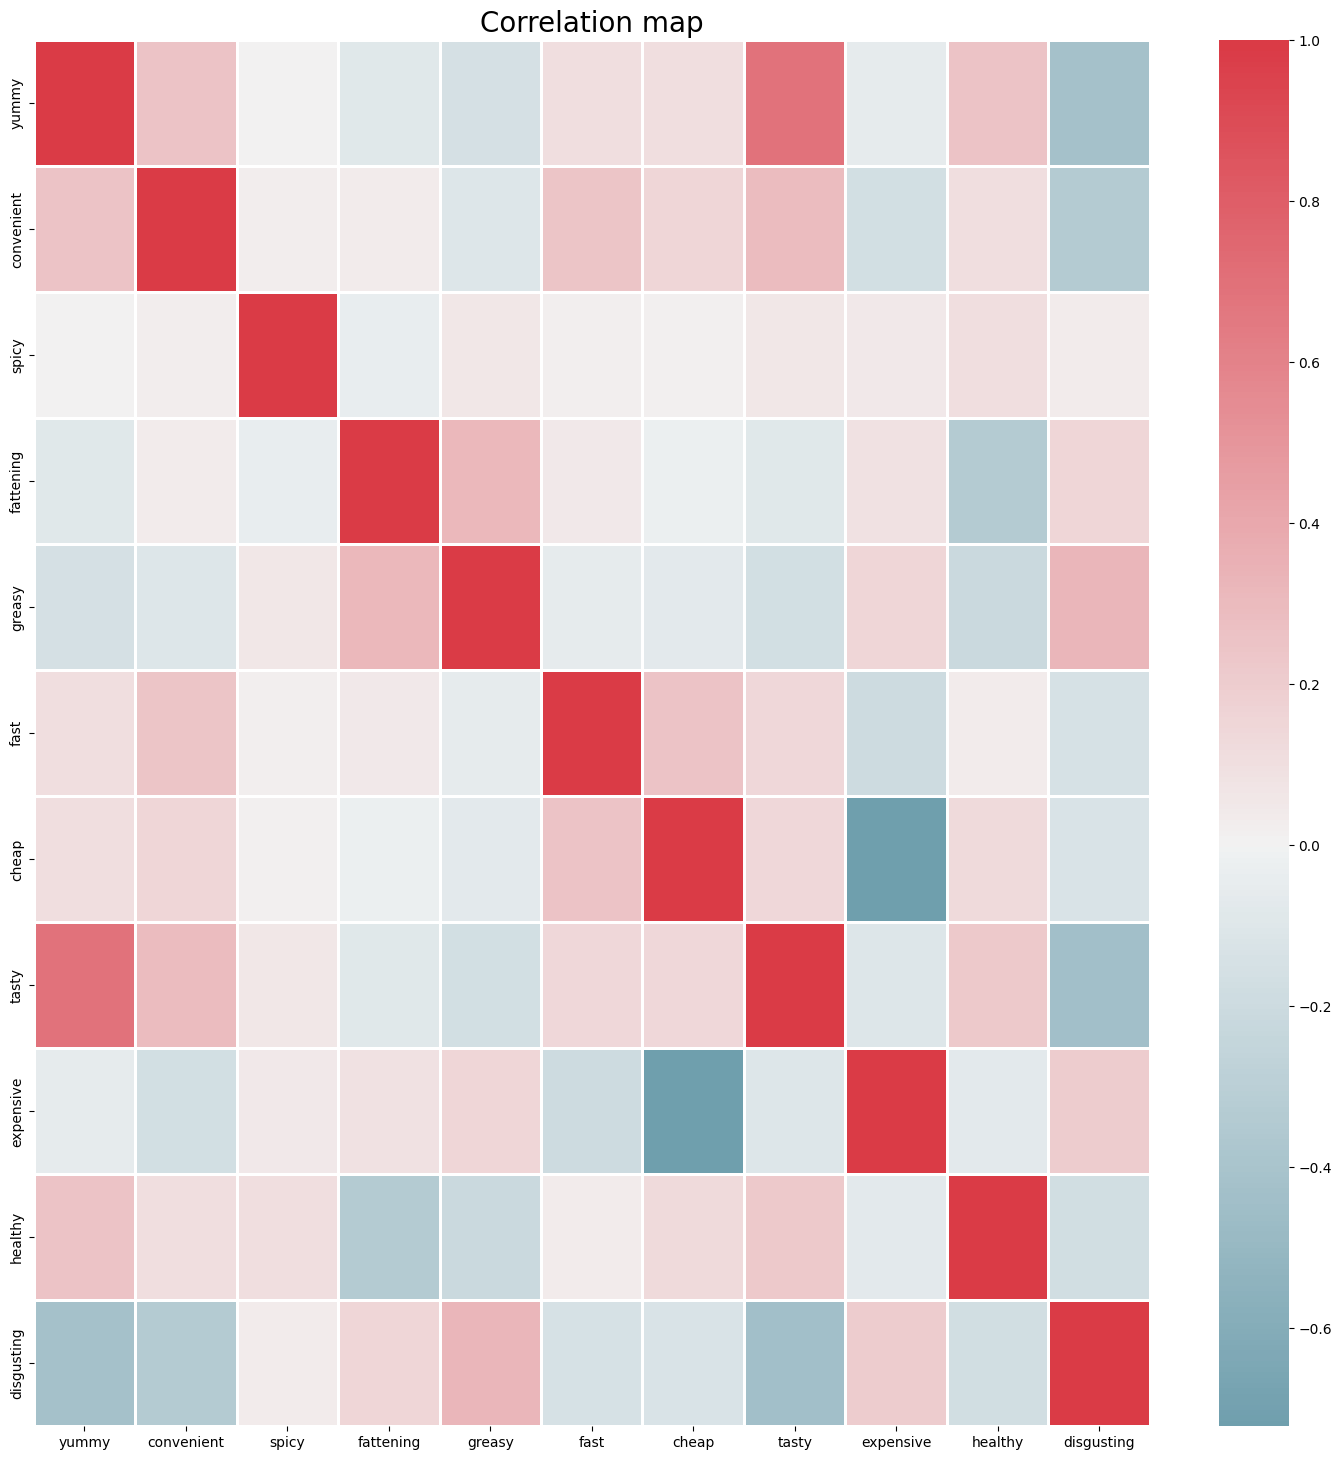

In [40]:
import seaborn as sns
corr = df.corr()

f, ax = plt.subplots(figsize = (18,18))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

heatmap = sns.heatmap(corr, cmap = cmap, center = 0.0, vmax = 1, ax = ax, linewidth = 1)

plt.title('Correlation map', fontsize = 20)
plt.show()

In [41]:
d = df.drop(['spicy', 'expensive'], axis = 1)
d.head()

,yummy,convenient,fattening,greasy,fast,cheap,tasty,healthy,disgusting
0,0,1,1,0,1,1,0,0,0
1,1,1,1,1,1,1,1,0,0
2,0,1,1,1,1,0,1,1,0
3,1,1,1,1,1,1,1,0,1
4,0,1,1,1,1,1,0,1,0


In [42]:

pca = PCA(4)

PC = pca.fit_transform(MD_scaled)
PC

array([[ 0.7043341 , -0.43701594,  0.26869753, -0.87207404],
       [-0.46782033,  0.36427698, -1.59683477, -0.00483542],
       [ 0.19198578,  1.71294939, -0.3394127 ,  3.36816847],
       ...,
       [-0.41427514,  1.8104382 , -1.07194798, -0.90103068],
       [-2.80362953,  0.56275909,  2.27888724,  0.0839242 ],
       [ 3.49910468,  1.06999906,  0.14897107, -0.19597725]])

In [43]:
PC1 = PC[:, 0]
PC2 = PC[:, 1]

In [44]:
PC1

array([ 0.7043341 , -0.46782033,  0.19198578, ..., -0.41427514,
       -2.80362953,  3.49910468])

In [45]:
ma = pca.components_
ma

array([[-0.40695508, -0.30882741, -0.02332033,  0.17786071,  0.26779582,
        -0.21303906, -0.28913434, -0.42611499,  0.29094445, -0.26683857,
         0.41074387],
       [ 0.28261487, -0.04568172,  0.0699822 , -0.20559024, -0.13630029,
        -0.28244059, -0.57503178,  0.24219851,  0.56752776,  0.20103082,
        -0.14388846],
       [-0.25958798, -0.31715142,  0.0201696 , -0.60807736, -0.38956798,
        -0.21139458,  0.1251574 , -0.26964779, -0.18329788,  0.36781371,
         0.09029919],
       [ 0.02623694, -0.00942396,  0.84549641, -0.02339555,  0.33085439,
         0.09036315,  0.11447698,  0.0726908 ,  0.03550987,  0.30198954,
         0.23523093]])

In [46]:
ma.shape

(4, 11)

In [47]:

PC1_scaled = 1.0/(PC1.max() - PC1.min())
PC1_scaled


0.1342255244911148

In [48]:

PC2_scaled = 1.0/(PC2.max() - PC2.min())
PC2_scaled

0.15793244547186128

In [49]:
features = d.columns
features

Index(['yummy', 'convenient', 'fattening', 'greasy', 'fast', 'cheap', 'tasty',
       'healthy', 'disgusting'],
      dtype='object')

Text(0, 0.5, 'PC2')

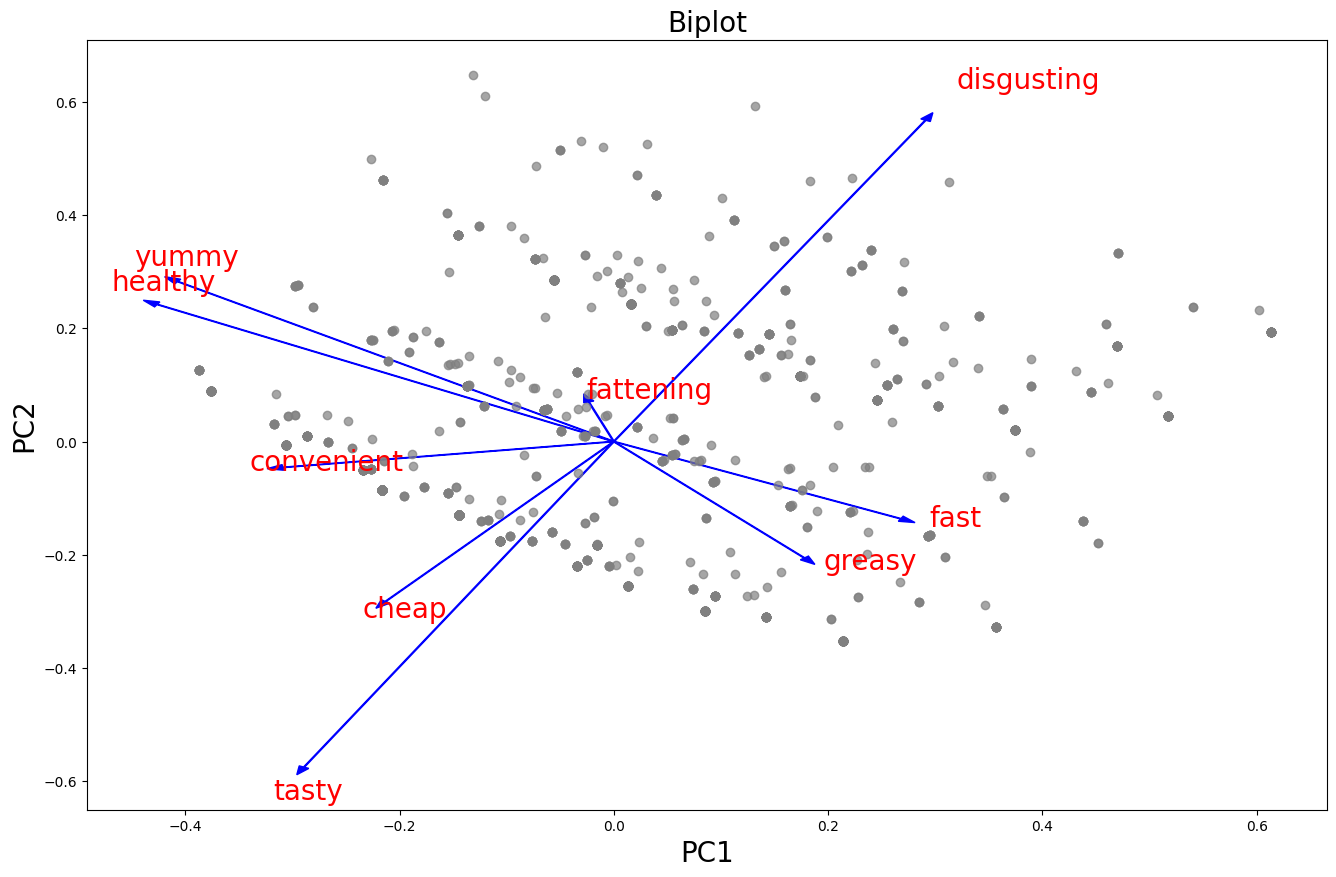

In [50]:
f, ax = plt.subplots(figsize = (16, 10))

for i, feature in enumerate(features):
    ax.arrow(0, 0, ma[0,i], ma[1,i], color = 'b', head_width = 0.01)
    ax.text(ma[0,i]*1.1, ma[1,i]*1.1, feature, color = 'r', fontsize = 20)

ax.scatter(PC1*PC1_scaled, PC2*PC2_scaled, color = 'grey', alpha = 0.7)

ax.set_title('Biplot', fontsize = 20)
ax.set_xlabel('PC1', fontsize = 20)
ax.set_ylabel('PC2', fontsize = 20)

In [51]:
columns = ['PC1','PC2','PC3','PC4']
PC_df = pd.DataFrame(data = PC, columns = columns)
PC_df.head()

,PC1,PC2,PC3,PC4
0,0.70,-0.44,0.27,-0.87
1,-0.47,0.36,-1.60,-0.00
2,0.19,1.71,-0.34,3.37
3,-0.12,-1.16,-1.00,0.47
4,-0.03,-1.39,0.79,0.47


In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans.fit(d)
MD_kmeans_labels = kmeans.fit_predict(d)

In [53]:
df['cluster_num'] = kmeans.labels_
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,2
3,1,1,0,1,1,1,1,1,0,0,1,2
4,0,1,0,1,1,1,1,0,0,1,0,0


In [54]:
# Specify the range of cluster numbers (2 to 8)
cluster_range = range(2, 9)

# Create dictionaries to store results
results = {"n_clusters": [], "inertia": [], "kmeans_model": []}

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(df)

    # Store the results for this cluster number
    results["n_clusters"].append(n_clusters)
    results["inertia"].append(kmeans.inertia_)
    results["kmeans_model"].append(kmeans)

# Print the results, including the best number of clusters based on inertia
for i in range(len(cluster_range)):
    print(f"Number of Clusters: {results['n_clusters'][i]}, Inertia: {results['inertia'][i]}")

# Find the best number of clusters based on the lowest inertia
best_index = np.argmin(results["inertia"])
best_n_clusters = results["n_clusters"][best_index]
best_kmeans_model = results["kmeans_model"][best_index]

print(f"Best Number of Clusters: {best_n_clusters}")

Number of Clusters: 2, Inertia: 2835.483768358574
Number of Clusters: 3, Inertia: 2148.2734430813243
Number of Clusters: 4, Inertia: 1679.1534307932789
Number of Clusters: 5, Inertia: 1508.5522358782655
Number of Clusters: 6, Inertia: 1376.40458348401
Number of Clusters: 7, Inertia: 1308.105133074301
Number of Clusters: 8, Inertia: 1199.4214104308326
Best Number of Clusters: 8


In [55]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 130, 6: 147, 1: 244, 3: 210, 5: 153, 0: 289, 7: 134, 4: 146})

In [56]:
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_)

[2 6 6 ... 5 4 0]
1199.4214104308326
7
[[ 6.57439446e-02  7.40484429e-01  9.34256055e-02  9.03114187e-01
   6.98961938e-01  7.26643599e-01 -9.99200722e-16  1.52249135e-01
   7.85467128e-01  5.19031142e-02  5.53633218e-01  3.00000000e+00]
 [ 8.52459016e-01  9.83606557e-01  7.78688525e-02  9.71311475e-01
   1.00000000e+00  9.50819672e-01  9.30327869e-01  9.71311475e-01
   3.88578059e-16  1.68032787e-01  8.19672131e-02  2.00000000e+00]
 [-1.11022302e-16  9.38461538e-01  5.38461538e-02  9.00000000e-01
   5.00000000e-01  9.76923077e-01  1.00000000e+00  1.11022302e-16
   3.07692308e-02  1.15384615e-01 -2.77555756e-16 -1.55431223e-15]
 [ 7.95238095e-01  9.71428571e-01  9.04761905e-02  8.76190476e-01
   0.00000000e+00  9.71428571e-01  1.00000000e+00  9.76190476e-01
   1.90476190e-02 -2.22044605e-16  9.52380952e-03  1.00000000e+00]
 [ 9.31506849e-01  9.86301370e-01  1.02739726e-01  4.65753425e-01
   0.00000000e+00  9.58904110e-01  9.24657534e-01  9.79452055e-01
   4.79452055e-02  1.00000000e+00

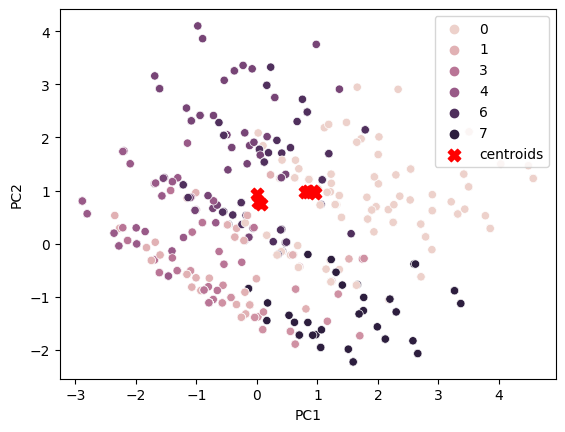

In [57]:
sns.scatterplot(data = PC_df, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [58]:
data['cluster_num'] = kmeans.labels_ #adding to df
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,2
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,6
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,6
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,1
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2


<ipython-input-59-25da909669bb>:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Like", y="Age",data=data,


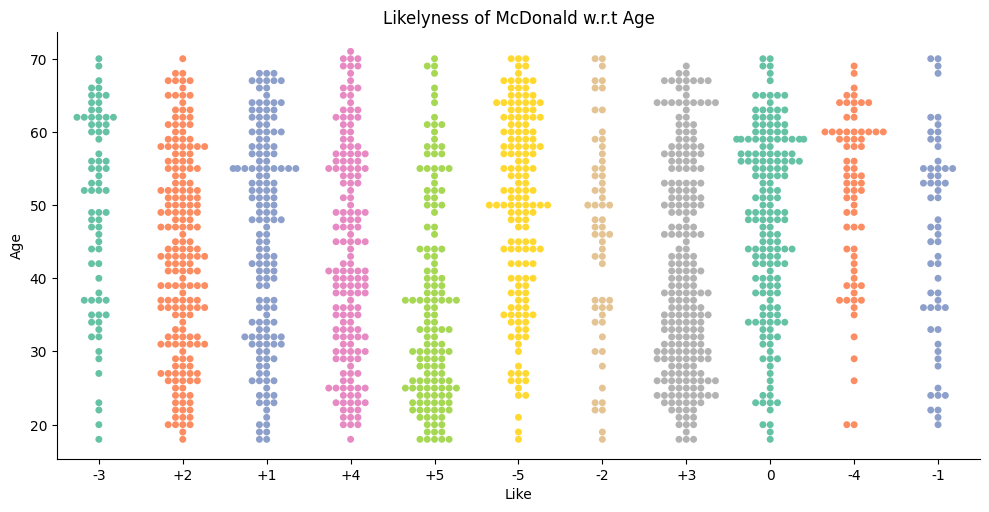

In [59]:
#Customer segmentation - based on pyschographic segmentation

#For convinence renaming the category
data['Like']= data['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like
sns.catplot(x="Like", y="Age",data=data,
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

In [60]:
crosstab = pd.crosstab(data['cluster_num'],data['Like'])

#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,85,28,30,23,16,55,20,15,15,1,1
1,2,2,3,7,13,21,31,44,44,42,35
2,6,13,16,12,15,25,14,20,8,1,0
3,2,2,2,2,2,26,32,30,52,38,22
4,0,1,0,0,0,5,9,18,42,27,44
5,0,0,2,2,4,11,16,33,32,32,21
6,2,3,2,3,5,13,23,22,35,19,20
7,55,22,18,10,3,13,7,5,1,0,0


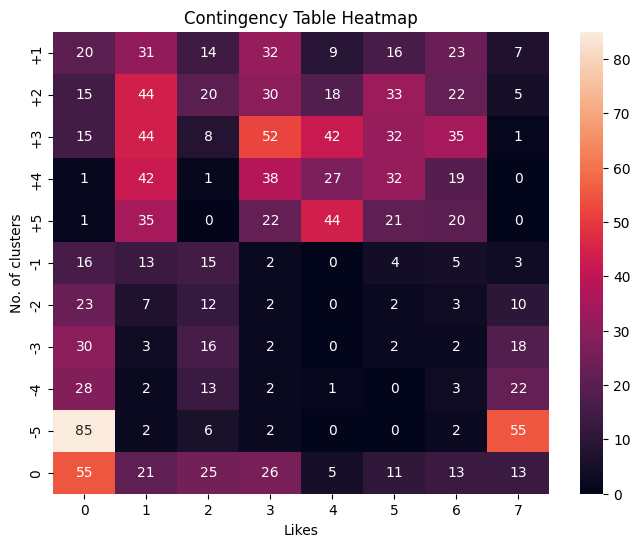

In [61]:
contingency_table = pd.crosstab(data['Like'], data['cluster_num'], rownames=['Likes'], colnames=['k'])

plt.figure(figsize = (8,6))
sns.heatmap(contingency_table, annot = True)

plt.xlabel('Likes')
plt.ylabel('No. of clusters')
plt.title('Contingency Table Heatmap')

plt.show()

In [62]:
crosstab_gender =pd.crosstab(data['cluster_num'],data['Gender'])

contingency_table = pd.crosstab(data['Gender'], data['cluster_num'], rownames=['Likes'], colnames=['k'])
contingency_table

k,0,1,2,3,4,5,6,7
Likes,,,,,,,,
Female,127,143,75,119,95,75,75,79
Male,162,101,55,91,51,78,72,55


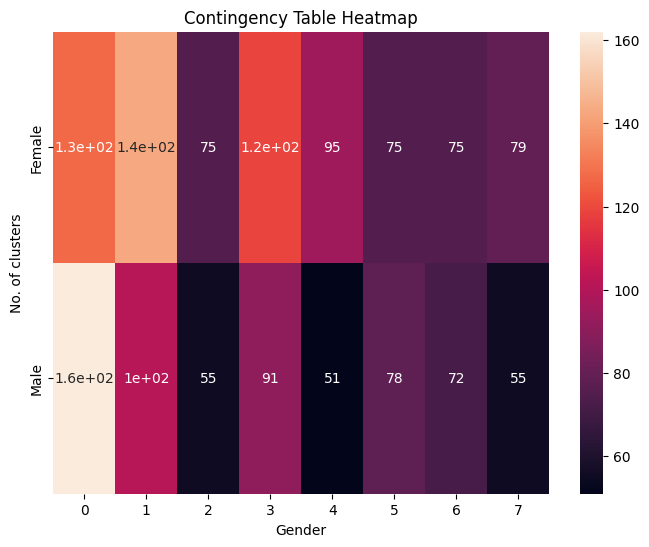

In [63]:
plt.figure(figsize = (8,6))
sns.heatmap(contingency_table, annot = True)

plt.xlabel('Gender')
plt.ylabel('No. of clusters')
plt.title('Contingency Table Heatmap')

plt.show()

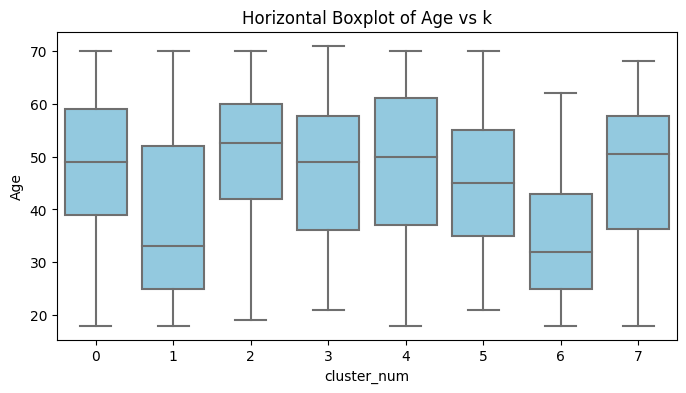

In [64]:
plt.figure(figsize = (8, 4))
#plt.boxplot(df2['Age'], vert = False, labels = ['Age'])
sns.boxplot(x = 'cluster_num', y = 'Age', data = data, color = 'skyblue')

# Add labels and title
plt.title('Horizontal Boxplot of Age vs k')

# Show the plot
plt.show()

In [65]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,2
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,6
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,6
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,1
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2


In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['VisitFrequency'] = le.fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.58
1,1,2.71
2,2,2.73
3,3,2.62
4,4,2.52
5,5,2.58
6,6,2.57
7,7,2.84


In [67]:

#Like
data['Like'] = le.fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like


,cluster_num,Like
0,0,6.99
1,1,3.16
2,2,5.43
3,3,3.17
4,4,2.86
5,5,2.83
6,6,3.12
7,7,7.53


In [68]:
#Gender
data['Gender'] = le.fit_transform(data['Gender'])
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.56
1,1,0.41
2,2,0.42
3,3,0.43
4,4,0.35
5,5,0.51
6,6,0.49
7,7,0.41


In [69]:
segment = Gender.merge(visit, on='cluster_num', how='left').merge(Like, on='cluster_num', how='left')
segment

,cluster_num,Gender,VisitFrequency,Like
0,0,0.56,2.58,6.99
1,1,0.41,2.71,3.16
2,2,0.42,2.73,5.43
3,3,0.43,2.62,3.17
4,4,0.35,2.52,2.86
5,5,0.51,2.58,2.83
6,6,0.49,2.57,3.12
7,7,0.41,2.84,7.53


In [70]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,7,61,0,0,2
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,1,51,0,0,6
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,0,62,0,0,6
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,3,69,4,0,1
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,1,49,3,1,2


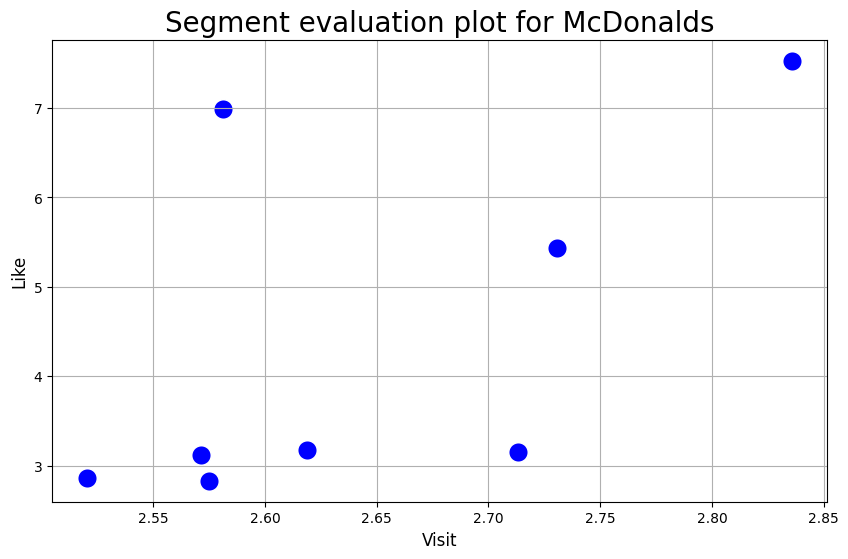

In [71]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "VisitFrequency", y = "Like",data = segment,s = 200, color="b")

plt.title("Segment evaluation plot for McDonalds", fontsize = 20)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)

plt.grid(True)
plt.show()